In [1]:
import os
import sys
from typing import *


# Setting the baseline:
os.chdir('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP')


curPath: str = os.getcwd() + "/src/VisualGraphStudy/"

dataPath: str = curPath + "_data/"

print("curPath = ", curPath, "\n")
print("dataPath = ", dataPath, "\n")


# Making files in utils folder visible here: to import pygraphviz helper file
sys.path.append(os.getcwd() + "/src/utils/")
# For being able to import files within CausalNex folder
sys.path.append(curPath)

sys.path

curPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/ 

dataPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/_data/ 



['/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python37.zip',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/lib-dynload',
 '',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/statisticallyfit/.ipython',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/utils/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/']

In [2]:
from src.utils.GraphvizUtil import *


structures: List[Tuple[Variable, Variable]] = [('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')]

variables: Dict[Variable, Dict] = {
    'D': {
        'desc': "Difficulty",
        'legend': {0: 'Easy', 1: 'Hard'},
        'cpd': { 0: 0.4, 1: 0.6}
    },
    'I': {
        'desc': "Intelligence",
        'legend': {0: 'Dumb', 1: 'Intelligent'},
        'cpd': { 0: 0.7, 1: 0.3 }
    },
    'G': {
        'desc': "Grade",
        'legend': { 0:'A', 1:'B', 2:'C' },
        'cpd': {
            0: { 'I': { 0: { 'D': { 0: 0.3, 1: 0.05 } },
                        1: { 'D': { 0: 0.9, 1: 0.5 } } } },
            1: { 'I': { 0: { 'D': { 0: 0.4, 1: 0.25 } },
                        1: { 'D': { 0: 0.08, 1: 0.3 } } } },
            2: { 'I': { 0: { 'D': { 0: 0.3, 1: 0.7 } },
                        1: { 'D': { 0: 0.02, 1: 0.2 } } } },
        }
    },
    'L': {
        'desc': "Letter",
        'legend': { 0:'Bad', 1:'Good' },
        'cpd': {
            0: { 'G': { 0: 0.1, 1: 0.4, 2: 0.99 } },
            1: { 'G': { 0: 0.9, 1: 0.6, 2: 0.01 } }
        }
    },
    'S':{
        'desc': "SAT",
        'legend': { 0:'Bad', 1:'Good' },
        'cpd': {
            0: { 'I': { 0: 0.95, 1: 0.2 } },
            1: { 'I': { 0: 0.05, 1: 0.8} }
        }
    }
}

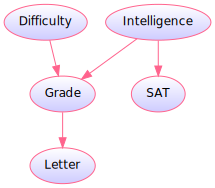

In [3]:
graph = dictToGraph(structures = structures, variables = variables)
graph

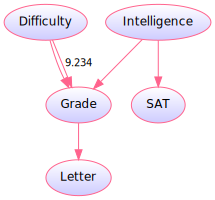

In [4]:
graphWeight = graph.copy()
graphWeight.edge(tail_name = 'D', head_name = 'G', label = '9.234')
graphWeight

In [5]:
variables

{'D': {'desc': 'Difficulty',
  'legend': {0: 'Easy', 1: 'Hard'},
  'cpd': {0: 0.4, 1: 0.6}},
 'I': {'desc': 'Intelligence',
  'legend': {0: 'Dumb', 1: 'Intelligent'},
  'cpd': {0: 0.7, 1: 0.3}},
 'G': {'desc': 'Grade',
  'legend': {0: 'A', 1: 'B', 2: 'C'},
  'cpd': {0: {'I': {0: {'D': {0: 0.3, 1: 0.05}}, 1: {'D': {0: 0.9, 1: 0.5}}}},
   1: {'I': {0: {'D': {0: 0.4, 1: 0.25}}, 1: {'D': {0: 0.08, 1: 0.3}}}},
   2: {'I': {0: {'D': {0: 0.3, 1: 0.7}}, 1: {'D': {0: 0.02, 1: 0.2}}}}}},
 'L': {'desc': 'Letter',
  'legend': {0: 'Bad', 1: 'Good'},
  'cpd': {0: {'G': {0: 0.1, 1: 0.4, 2: 0.99}},
   1: {'G': {0: 0.9, 1: 0.6, 2: 0.01}}}},
 'S': {'desc': 'SAT',
  'legend': {0: 'Bad', 1: 'Good'},
  'cpd': {0: {'I': {0: 0.95, 1: 0.2}}, 1: {'I': {0: 0.05, 1: 0.8}}}}}

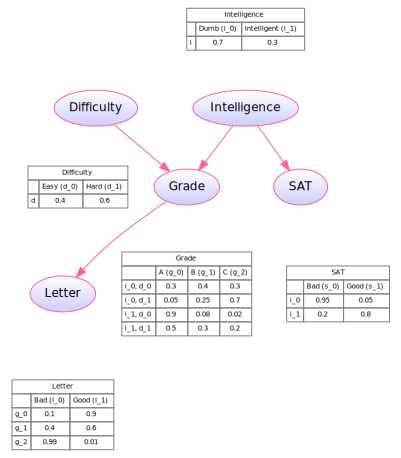

In [6]:
graphProbs = dictToGraphCPD(graphNoTable= graph, variables = variables)
graphProbs




In [7]:
# Build model now with pgmpy and convert from pgmpy's tabular CPD's into the above `variables` dict format above, so we can render the PGM with its CPDs
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining mdoel structure, just by passing a list of edges.
model: BayesianModel = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])
#model: BayesianModel = BayesianModel([('Difficulty', 'Grade'), ('Intelligence', 'Grade'), ('Grade', 'Letter'), ('Intelligence', 'SAT')])


# Defining individual CPDs with state names
cpdState_D = TabularCPD(variable = 'D', variable_card = 2, values = [[0.6, 0.4]],
                        state_names = {'D' : ['Easy', 'Hard']})

cpdState_I = TabularCPD(variable = 'I', variable_card=2, values = [[0.7, 0.3]],
                        state_names = {'I' : ['Dumb', 'Intelligent']})

cpdState_G = TabularCPD(variable = 'G', variable_card = 3, values = [[0.3, 0.05, 0.9, 0.5],
                                                                     [0.4, 0.25, 0.08, 0.3],
                                                                     [0.3, 0.7, 0.02, 0.2]],
                        evidence = ['I', 'D'], evidence_card = [2,2],
                        state_names = {'G': ['A', 'B', 'C'], 'I' : ['Dumb', 'Intelligent'], 'D':['Easy', 'Hard']})

cpdState_L = TabularCPD(variable = 'L', variable_card = 2, values = [[0.1, 0.4, 0.99],
                                                                     [0.9, 0.6, 0.01]],
                        evidence = ['G'], evidence_card = [3],
                        state_names = {'L' : ['Bad', 'Good'], 'G': ['A', 'B', 'C']})

cpdState_S = TabularCPD(variable = 'S', variable_card = 2, values = [[0.95, 0.2],
                                                                     [0.05, 0.8]],
                        evidence = ['I'], evidence_card = [2],
                        state_names={'S': ['Bad', 'Good'], 'I': ['Dumb', 'Intelligent']})

# Associating the CPDs with the network:
model.add_cpds(cpdState_D, cpdState_I, cpdState_G, cpdState_L, cpdState_S)
assert model.check_model()

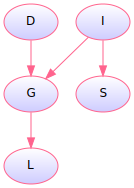

In [8]:
pgmpyToGraph(model)

In [9]:
pgmpyToGrid(model, 'G')

[['Dumb', 'Easy', 0.3, 0.4, 0.3],
 ['Dumb', 'Hard', 0.05, 0.25, 0.7],
 ['Intelligent', 'Easy', 0.9, 0.08, 0.02],
 ['Intelligent', 'Hard', 0.5, 0.3, 0.2]]

In [10]:
import pandas as pd
from pandas.core.frame import DataFrame


#gradeDF = DataFrame(pgmpyToGrid(model, 'G'), columns = ['Intelligence', 'Difficulty'] + condVarStateNames[0]); gradeDF

In [11]:
# Too bad the string version does not have lines like the object version so can't just substitute this as edge label, needs to have those weird html tags to work...
#print(str(gradeDF))

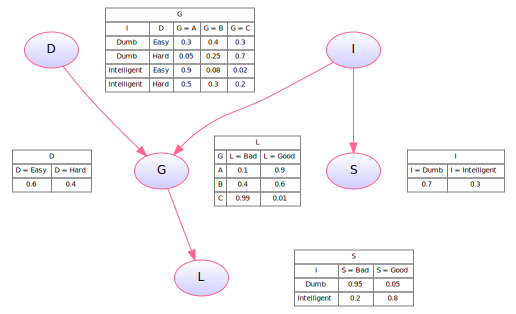

In [12]:

pgmpyToGraphCPD(model)